 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [122]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [174]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [124]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [125]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [175]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [127]:
# Count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [128]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [176]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()

C:\Users\danie\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [130]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [131]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [132]:
# Calculate Daily Returns
sp500_history_df.isnull().sum()
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [133]:
# Drop nulls
sp500_returns_df.pct_change
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [134]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500"})
sp500_returns_df.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [135]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

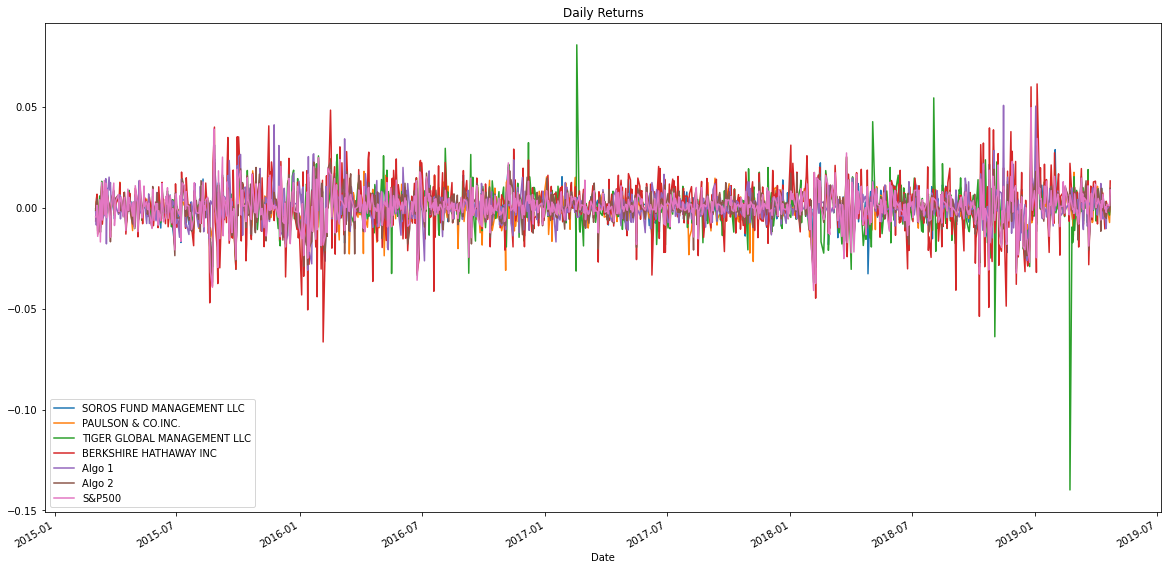

In [136]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

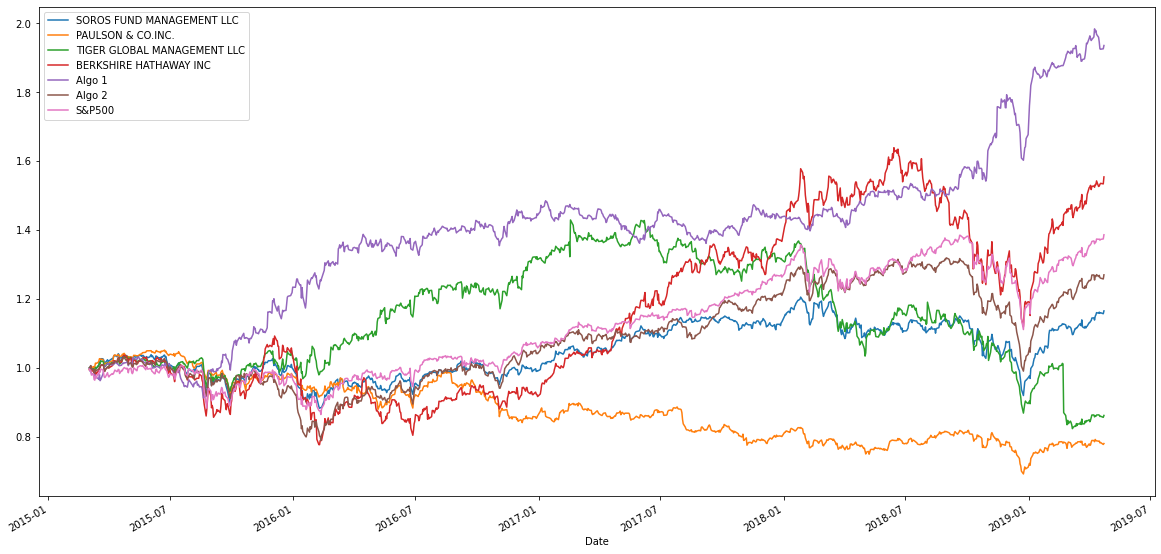

In [137]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
# Plot cumulative returns
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

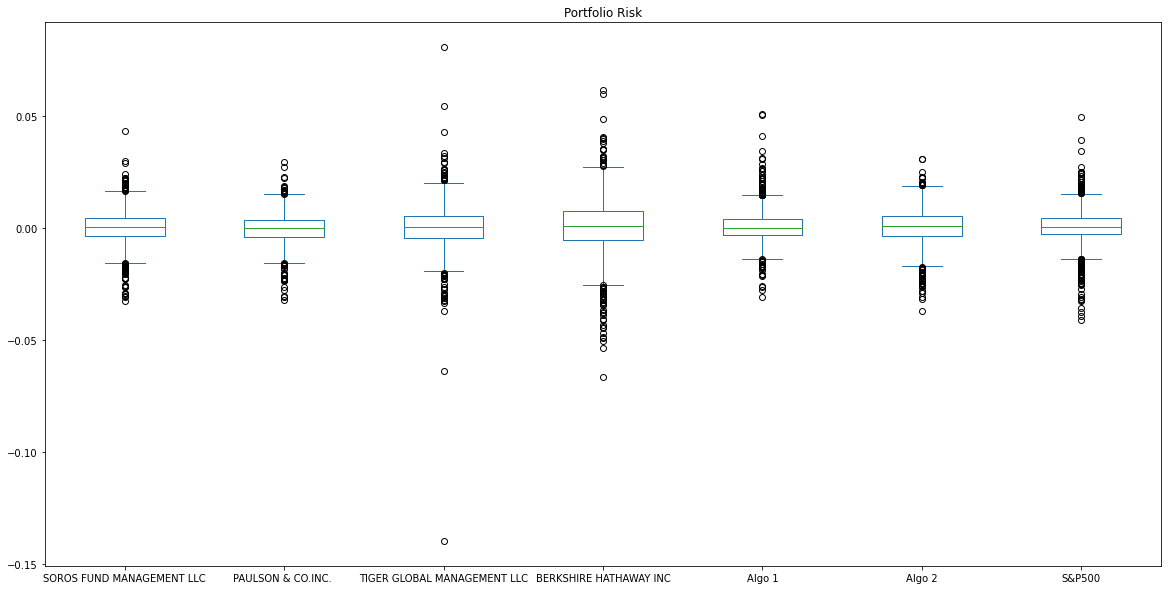

In [138]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [139]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [140]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns_df.std().sort_values(ascending=False)
sp500_std.head()


S&P500    0.008111
dtype: float64

In [141]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
portfolios_riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [142]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

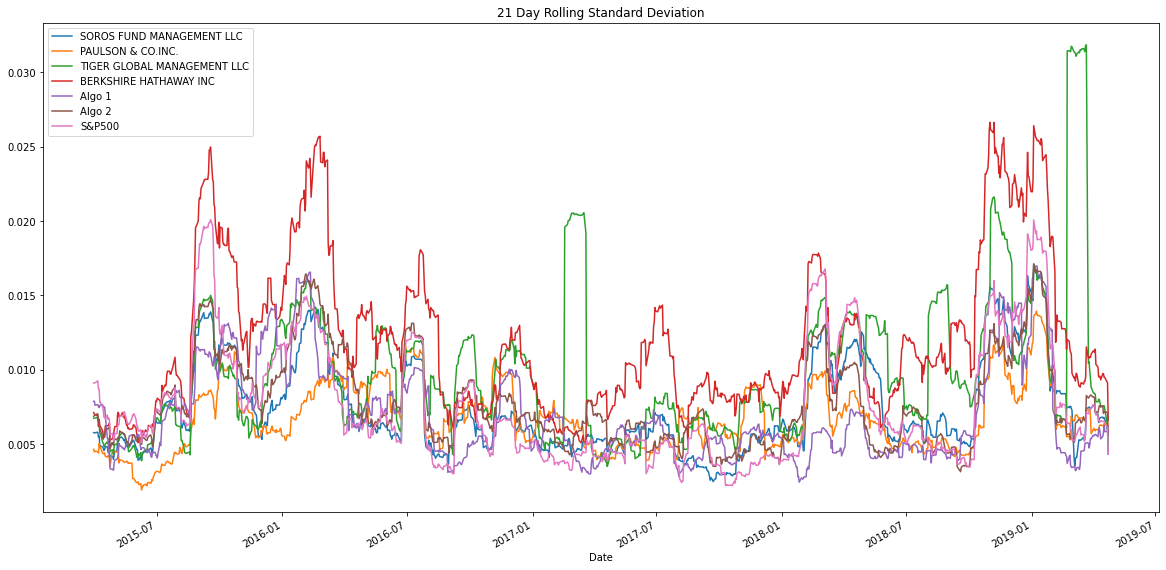

In [143]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

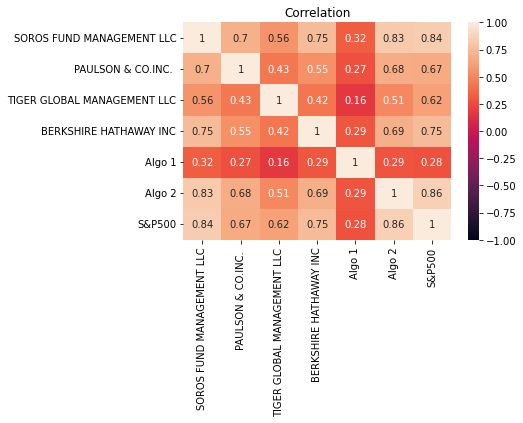

In [144]:
# Calculate the correlation
correlation = combined_portfolios_df.corr()
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True).set_title("Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

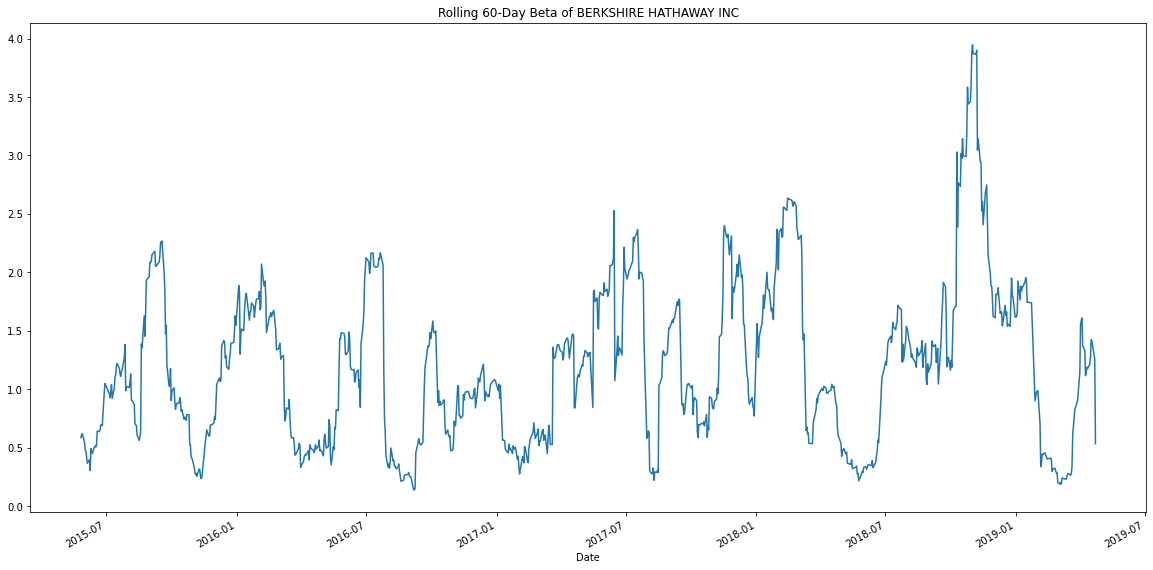

In [145]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_portfolios_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_portfolios_df['S&P500'])
# Calculate variance of S&P 500
rolling_variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

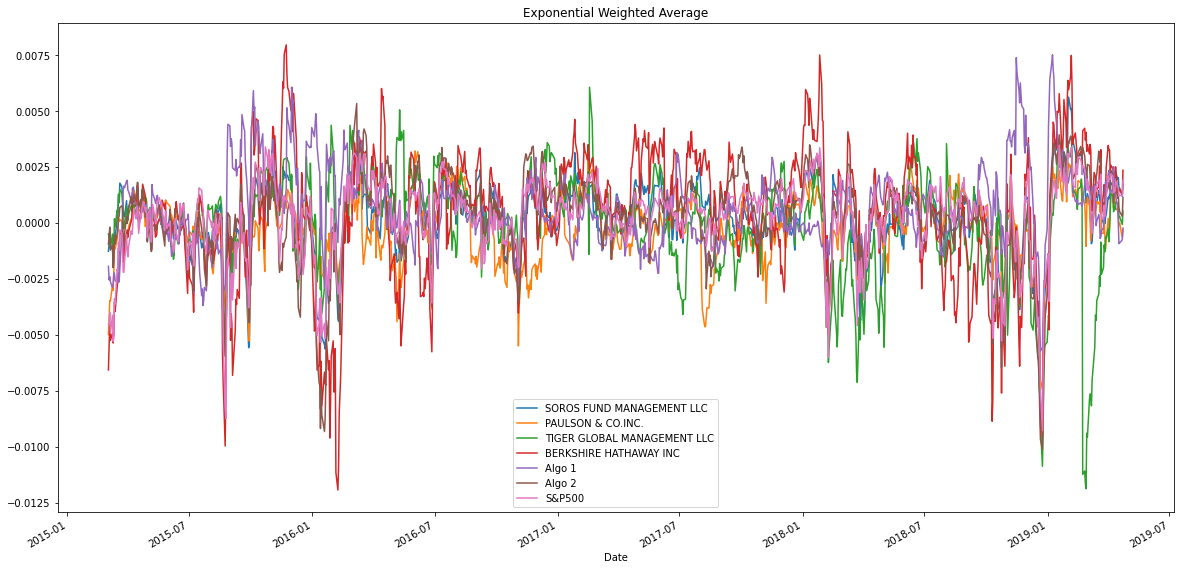

In [147]:
# Use `ewm` to calculate the rolling window
combined_portfolios_ewm = combined_portfolios_df.ewm(span = 21,adjust = False).mean()
combined_portfolios_ewm.plot(figsize=(20,10), title="Exponential Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

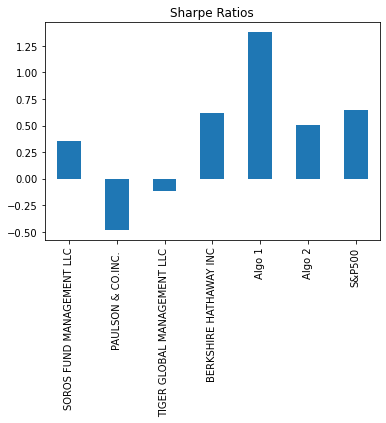

In [149]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms both the whale portfolios and the S&P  500
---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [179]:
# Reading data from 1st stock
tsla_csv = Path("Resources/TSLA_historical.csv")
tsla_df = pd.read_csv(tsla_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.rename(columns={"Close":"TSLA"})
tsla_df.head()

,TSLA
Date,
2018-12-20,63.08
2018-12-21,63.95
2018-12-24,59.08
2018-12-26,65.22
2018-12-27,63.23


In [178]:
# Reading data from 2nd stock
amzn_csv = Path("Resources/AMZN_historical.csv")
amzn_df = pd.read_csv(amzn_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df = amzn_df.rename(columns={"Close":"AMZN"})
amzn_df.head()

,AMZN
Date,
2018-12-20,1460.83
2018-12-21,1377.45
2018-12-24,1343.96
2018-12-26,1470.90
2018-12-27,1461.64


In [177]:
# Reading data from 3rd stock
msft_csv = Path("Resources/MSFT_historical.csv")
msft_df = pd.read_csv(msft_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
msft_df = msft_df.rename(columns={"Close":"MSFT"})
msft_df.head()

,MSFT
Date,
2018-12-20,101.51
2018-12-21,98.23
2018-12-24,94.13
2018-12-26,100.56
2018-12-27,101.18


In [153]:
# Combine all stocks in a single DataFrame
combined_custom = pd.concat([tsla_df,amzn_df,msft_df], axis='columns', join='inner')
combined_custom.head()

,TSLA,AMZN,MSFT
Date,,,
2018-12-20,63.08,1460.83,101.51
2018-12-21,63.95,1377.45,98.23
2018-12-24,59.08,1343.96,94.13
2018-12-26,65.22,1470.90,100.56
2018-12-27,63.23,1461.64,101.18


In [154]:
# Reset Date index
combined_custom.reset_index()

,Date,TSLA,AMZN,MSFT
0,2018-12-20,63.08,1460.83,101.51
1,2018-12-21,63.95,1377.45,98.23
2,2018-12-24,59.08,1343.96,94.13
3,2018-12-26,65.22,1470.90,100.56
4,2018-12-27,63.23,1461.64,101.18
...,...,...,...,...
499,2020-12-14,639.83,3156.97,214.20
500,2020-12-15,633.25,3165.12,214.13
501,2020-12-16,622.77,3240.96,219.28
502,2020-12-17,655.90,3236.08,219.42


In [155]:
# Reorganize portfolio data by having a column per symbol


In [156]:
# Calculate daily returns
custom_daily_returns = combined_custom.pct_change()
# Drop NAs
custom_daily_returns.dropna(inplace=True)
# Display sample data
custom_daily_returns.head()

,TSLA,AMZN,MSFT
Date,,,
2018-12-21,0.013792,-0.057077,-0.032312
2018-12-24,-0.076153,-0.024313,-0.041739
2018-12-26,0.103927,0.094452,0.068310
2018-12-27,-0.030512,-0.006295,0.006165
2018-12-28,0.055986,0.011207,-0.007808


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [157]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_daily_returns.dot(weights)
custom_portfolio_returns = custom_portfolio_returns.rename("Custom_Portfolio")
# Display sample data
custom_portfolio_returns


Date
2018-12-21   -0.025199
2018-12-24   -0.047402
2018-12-26    0.088896
2018-12-27   -0.010214
2018-12-28    0.019795
                ...   
2020-12-14    0.022113
2020-12-15   -0.002676
2020-12-16    0.010487
2020-12-17    0.017444
2020-12-18    0.015064
Name: Custom_Portfolio, Length: 503, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [158]:
# Join your returns DataFrame to the original returns DataFrame
combine_everything_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df, custom_portfolio_returns], axis='columns', join='inner')

combine_everything_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom_Portfolio
Date,,,,,,,,
2018-12-21,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.020588,-0.025199
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112,-0.047402
2018-12-26,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594,0.088896
2018-12-27,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563,-0.010214
2018-12-28,0.001145,0.000863,-0.004019,-0.006178,0.014664,0.011664,-0.001242,0.019795
2018-12-31,0.007059,0.005695,-0.004084,0.005696,0.006768,0.005743,0.008492,0.008271
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.001269,-0.015966
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.031157
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.051446


In [159]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_everything_df.isnull().dropna()
combine_everything_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom_Portfolio
Date,,,,,,,,
2018-12-21,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.020588,-0.025199
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112,-0.047402
2018-12-26,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594,0.088896
2018-12-27,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563,-0.010214
2018-12-28,0.001145,0.000863,-0.004019,-0.006178,0.014664,0.011664,-0.001242,0.019795


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [160]:
# Calculate the annualized `std`
combine_everything = combine_everything_df.std() * np.sqrt (252)
combine_everything

SOROS FUND MANAGEMENT LLC      0.146335
PAULSON & CO.INC.              0.128606
TIGER GLOBAL MANAGEMENT LLC    0.290710
BERKSHIRE HATHAWAY INC         0.230826
Algo 1                         0.134488
Algo 2                         0.140438
S&P500                         0.160503
Custom_Portfolio               0.300212
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

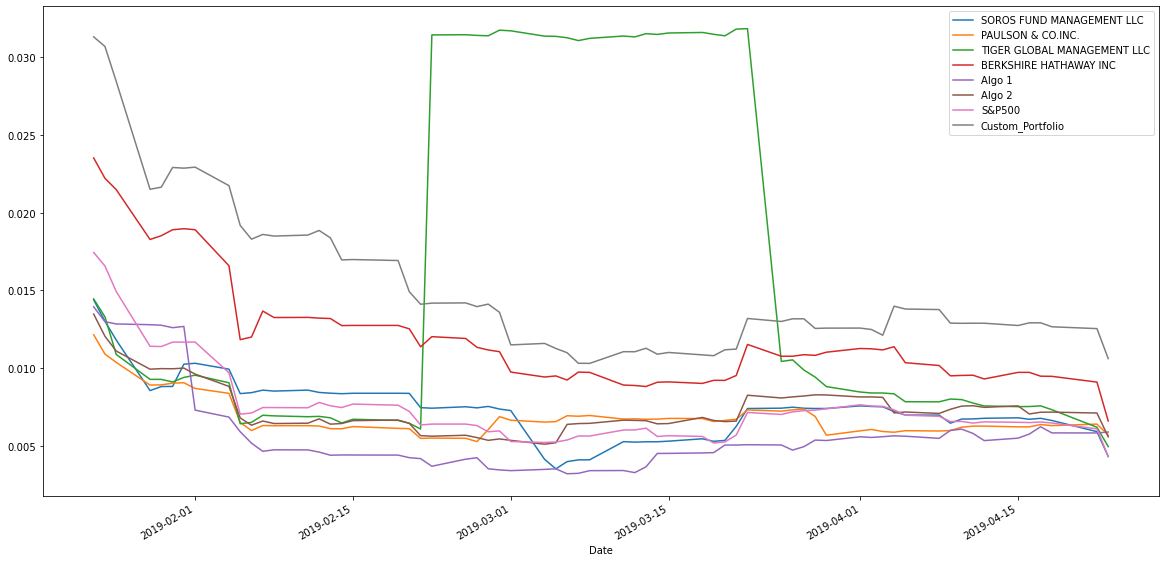

In [187]:
# Calculate rolling standard deviation
combine_everything_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

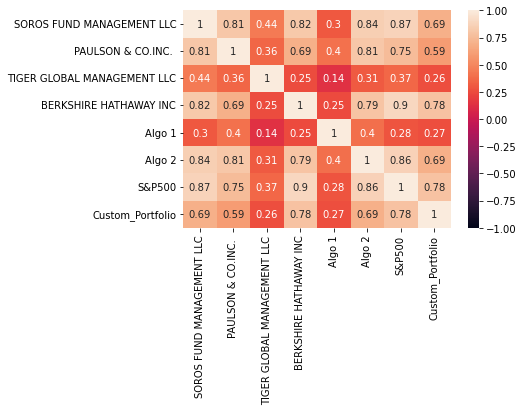

In [190]:
# Calculate and plot the correlation
correlation1 = combine_everything_df.corr()
sns.heatmap(correlation1, vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}, xlabel='Date'>

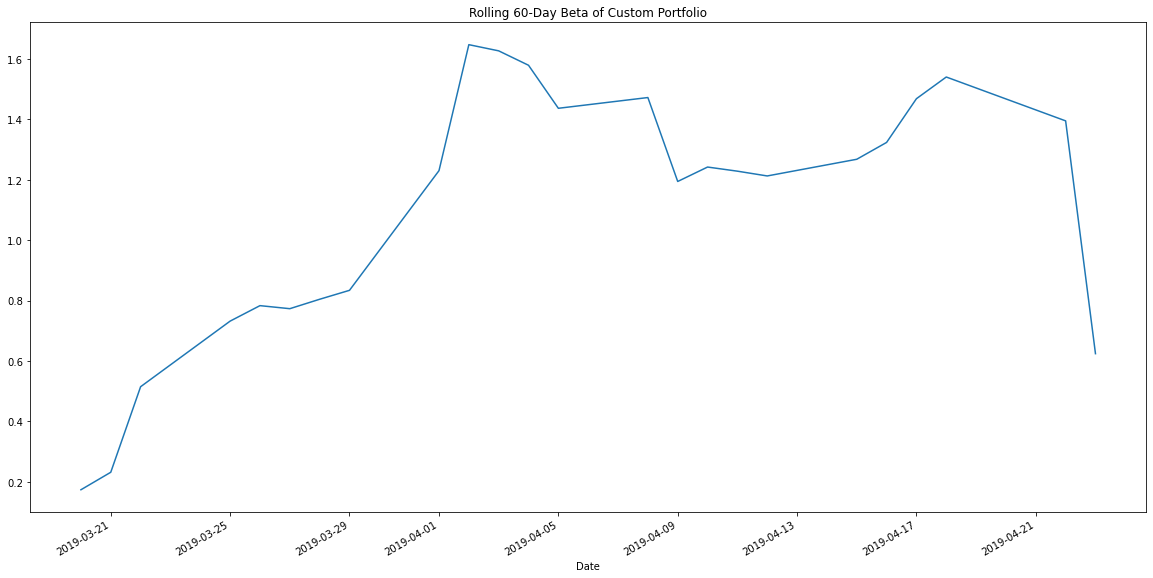

In [191]:
rolling_covariance = combine_everything_df['Custom_Portfolio'].rolling(window=21).cov(combine_everything_df['S&P500'])
# Calculate variance of S&P 500
rolling_variance = combine_everything_df['S&P500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [192]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_everything = (combine_everything_df.mean() * 252) / (combine_everything_df.std() * np.sqrt(252))
sharpe_ratios_everything.sort_values(ascending = False)

Algo 2                         4.659710
SOROS FUND MANAGEMENT LLC      4.114757
Algo 1                         3.837071
BERKSHIRE HATHAWAY INC         3.778627
S&P500                         3.356231
PAULSON & CO.INC.              2.120974
Custom_Portfolio               1.300469
TIGER GLOBAL MANAGEMENT LLC   -0.474527
dtype: float64

<AxesSubplot:>

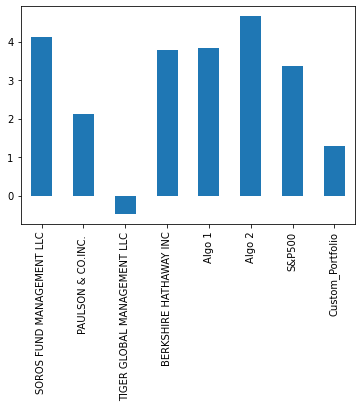

In [193]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_everything.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

My portfolio under performs compared to the others but at least it has not gone negative like Tiger Global. 